In [3]:
from music21 import *

environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'
environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
environment.set("musicxmlPath", "/usr/bin/musescore")

from IPython.display import Image

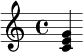

In [4]:
c = chord.Chord("C4 E4 G4")
c.isConsonant()
c.show('lily.png')
Image(filename=c.write('lily.png'))

In [ ]:
#?? audio embed note working? 
#- requires a stylesheet served from http but this server is on https and mixed protocol disallowed

In [18]:
c.show('midi')

In [17]:
def playMidi(filename):
    mf = midi.MidiFile()
    mf.open(filename)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

c.write('midi',fp='tmp.midi')
playMidi('tmp.midi')

In [16]:
!ls

apt.txt			       core.musescore.54.1509791664
core.musescore.104.1509792368  core.musescore.61.1509791682
core.musescore.116.1509792530  core.musescore.68.1509791686
core.musescore.128.1509792907  core.musescore.80.1509791723
core.musescore.140.1509793100  core.musescore.92.1509792362
core.musescore.152.1509793105  index.ipynb
core.musescore.164.1509793113  index_music.ipynb
core.musescore.176.1509793117  OpenLearn Demo - Intro to Music Theory.ipynb
core.musescore.188.1509793138  postBuild
core.musescore.208.1509793289  README.md
core.musescore.215.1509793477  requirements.txt
core.musescore.217.1509793518


In [10]:
%load_ext music21.ipython21
#extension is broken?
c.show()

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


SubConverterFileIOException: png file of xml not found. Is your file >999 pages?

In [ ]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

alto.show('lily.png')
Image(filename=alto.write('lily.png'))